<a href="https://colab.research.google.com/github/mequanent/Deep-Learning/blob/main/HW2_DL_Mequanent_110761504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the repository to access the data sets for Q 1.
!npx degit https://github.com/mequanent/Deep-Learning -f

npx: installed 1 in 2.77s
> destination directory is not empty. Using --force, continuing
> cloned mequanent/Deep-Learning#HEAD


# Libraries

In [2]:
import numpy as np
import pandas as pd
import random
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

# 1.
(20%) Please construct a neural net (with its architecture shown below) and train it on ‘train.mat.” The activation function must be used in the two hidden layers and the output layer. You can construct and optimize your network model by using any off-the-shelf functions. Report the test error on the test set ‘test.mat’ (percentage of misclassified test samples).

## Read Dataset

In [3]:
train = loadmat(r"HW2/train.mat")
test = loadmat(r"HW2/test.mat")
train_df = pd.DataFrame()
train_df['x1'] = train['x1'].flatten()
train_df['x2'] = train['x2'].flatten()
train_df['y'] = train['y']

test_df = pd.DataFrame()
test_df['x1'] = test['x1'].flatten()
test_df['x2'] = test['x2'].flatten()
test_df['y'] = test['y']

In [ ]:
train_df.shape, test_df.shape

((70, 3), (30, 3))

In [4]:
model_1 = keras.Sequential()
model_1.add(Dense(3, input_shape=(2,), activation='relu',
                  use_bias=True, bias_initializer='ones'))
model_1.add(Dense(2, activation='relu', use_bias=True, bias_initializer='ones'))
model_1.add(Dense(1, activation='sigmoid', use_bias=True, bias_initializer='zeros'))

model_1.compile(optimizer='adam', metrics=['accuracy'],
              loss=keras.losses.BinaryCrossentropy(from_logits=True))
model_1.summary()

x = np.column_stack((train_df.x1.values, train_df.x2.values))
x_test = np.column_stack((test_df.x1.values, test_df.x2.values))

model_1.fit(x, train_df.y.values, batch_size=10, epochs=400, validation_split=0.1, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [5]:
evaluation = model_1.evaluate(x_test, test_df.y.values)
error_rate = 1 - evaluation[1]
print("Prediction error rate on test data: ", error_rate)

1/1 [==============================] - 0s 17ms/step - loss: 0.1412 - accuracy: 0.9667
Prediction error rate on test data:  0.03333336114883423


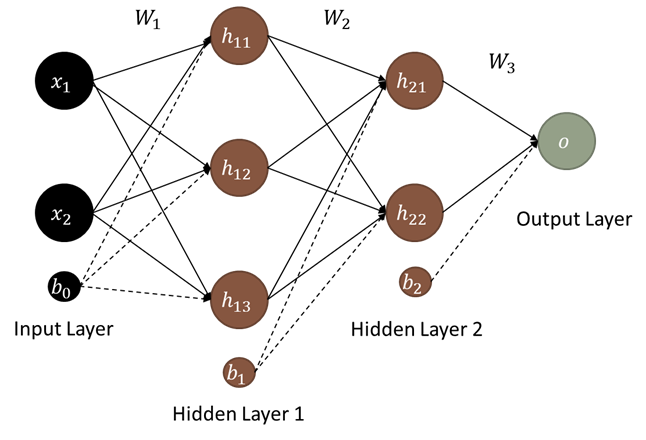

# 2

## 2.1
(20%) You are asked to construct a classification model based on multi-layer convolutional neural networks (at least five layers) for digit recognition. Please report the prediction accuracy for the test set. (Hint: its loss function could be cross entropy)

In [6]:
def preprocess():
  # load dataset
  (trainX, trainy), (testX, testy) = mnist.load_data()
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

  trainX = trainX.astype('float') / 255
  testX = testX.astype('float') / 255

  trainy = to_categorical(trainy)
  testy = to_categorical(testy)
  return trainX, testX, trainy, testy

xtrain, xtest, ytrain, ytest = preprocess()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
def build_cnn_model(x_train, y_train):
  input_shape = x_train.shape[1:]
  model = keras.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.summary()

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.1)

  return model

In [12]:
model_2_1 = build_cnn_model(xtrain, ytrain)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 20, 20, 64)        73792     
                                                                 
 conv2d_14 (Conv2D)          (None, 18, 18, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                      

In [14]:
evaluation = model_2_1.evaluate(xtest, ytest, verbose=0)
print("Test loss: ", evaluation[0])
print("Prediction error: ", 1 - evaluation[1])
print("Test accuracy: ", evaluation[1])

Test loss:  0.03906821832060814
Prediction error:  0.0062999725341796875
Test accuracy:  0.9937000274658203


## 2.2
(15%) Please randomly set 5%, 10%, and 15% of pixels to 255 for each image and evaluate the test set using the model you trained on clean images from 2.1. Report the prediction accuracies for the three different corruption rates. Compare your results with those in Question 2.1. What do you find?

In [15]:
def corrupt(data, corrupt_lv):
  #corrupt_lv = 0.05    #% using 5% and training data as an example
  img_size = 28*28
  corrupted = []
  for i in range(len(data)):
    ran_seq = random.sample([n for n in range(img_size)], int(img_size*corrupt_lv))
    x = data[i].reshape(-1, img_size)
    x[0, ran_seq] = 1 # 1 because already normalized by 255
    x = x.reshape((28, 28, 1))
    corrupted.append(x)
  return np.array(corrupted)

In [16]:
xtest_corrupted_5 = corrupt(xtest.copy(), 0.05)
xtest_corrupted_10 = corrupt(xtest.copy(), 0.1)
xtest_corrupted_15 = corrupt(xtest.copy(), 0.15)

In [17]:
# To check if the corrupting method works properly
np.sum(xtest_corrupted_5 != xtest), np.sum(xtest_corrupted_10 != xtest), np.sum(xtest_corrupted_15 != xtest)

(387097, 774348, 1161626)

In [18]:
# Evaluate the model in 2.1 with the corrupted testing datasets
score_5 = model_2_1.evaluate(xtest_corrupted_5, ytest, verbose=0)
score_10 = model_2_1.evaluate(xtest_corrupted_10, ytest, verbose=0)
score_15 = model_2_1.evaluate(xtest_corrupted_15, ytest, verbose=0)

In [19]:
print("Test accuracy of model in 2.1 with NO noise: ", evaluation[1])
print("Test accuracy of the model in 2.1 with 5% noise: ", score_5[1])
print("Test accuracy of the model in 2.1  with 10% noise: ", score_10[1])
print("Test accuracy of the model in 2.1  with 15% noise: ", score_15[1])

Test accuracy of model in 2.1 with NO noise:  0.9937000274658203
Test accuracy of the model in 2.1 with 5% noise:  0.9298999905586243
Test accuracy of the model in 2.1  with 10% noise:  0.770799994468689
Test accuracy of the model in 2.1  with 15% noise:  0.5733000040054321


The accuracy before introducing any noise to the dataset is better than all others.
The prediction accuracy of the model trained with noise free dataset lowers down as the percentage of the noise introduced to the testing dataset increases.

## 2.3
(15%) Following Question 2.2, please re-train your model with the corrupted data (5%, 10%, and 15% separately) and re-evaluate the test set.
Report the prediction accuracies also for the three different corruption rates. Compare your results with those from 2.1 and 2.2. What do you find?


In [20]:
# get corrupted training data
xtrain_corrupted_5 = corrupt(xtrain.copy(), 0.05)
xtrain_corrupted_10 = corrupt(xtrain.copy(), 0.1)
xtrain_corrupted_15 = corrupt(xtrain.copy(), 0.15)

Train a CNN model with the same structure as in 2.1 by using the $5\%, 10\%$, and $15\%$ corrupted datasets and see the prediction accuracy for each percentage of corrupted testing data, including the original ($0\%$ corrupted data).

In [21]:
def get_model_x_accuracies(xtrain_corrupted_x, ytrain):
  ''' model_x is a model trained with x% corrupted training data and tested 
  with all the testing set of 0, 5, 10, and 15% corrupted test sets'''
  model_x = build_cnn_model(xtrain_corrupted_x, ytrain)
  acc_x_0 = model_x.evaluate(xtest, ytest)
  acc_x_5 = model_x.evaluate(xtest_corrupted_5, ytest)
  acc_x_10 = model_x.evaluate(xtest_corrupted_10, ytest)
  acc_x_15 = model_x.evaluate(xtest_corrupted_15, ytest)

  # return accuracies of the model
  return acc_x_0[1], acc_x_5[1], acc_x_10[1], acc_x_15[1]

In [22]:
# get the accuracies of each model on each test set
acc_5_0, acc_5_5, acc_5_10, acc_5_15 = get_model_x_accuracies(xtrain_corrupted_5, ytrain)
acc_10_0, acc_10_5, acc_10_10, acc_10_15 = get_model_x_accuracies(xtrain_corrupted_10, ytrain)
acc_15_0, acc_15_5, acc_15_10, acc_15_15 = get_model_x_accuracies(xtrain_corrupted_15, ytrain)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 20, 20, 64)        73792     
                                                                 
 conv2d_19 (Conv2D)          (None, 18, 18, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                      

In [27]:
# display the accuracies 
print('Testing prediction for 0, 5, 10 and 15 % corrupted test data, respectively.')
print('*'*50)
print('Test accuracies of the model trained with 5% corrupted training data')
print(round(acc_5_0*100, 4), round(acc_5_5*100, 4), round(acc_5_10*100, 4),
      round(acc_5_15*100, 4))

print('Test accuracies of the model trained with 10% corrupted training data')
print(round(acc_10_0*100, 4), round(acc_10_5*100, 4), round(acc_10_10*100, 4),
      round(acc_10_15*100, 4))

print('Test accuracies of the model trained with 15% corrupted training data')
print(round(acc_15_0*100, 4), round(acc_15_5*100, 4), round(acc_15_10*100, 4),
      round(acc_15_15*100, 4))

Testing prediction for 0, 5, 10 and 15 % corrupted test data, respectively.
**************************************************
Test accuracies of the model trained with 5% corrupted training data
99.25 99.21 99.15 98.73
Test accuracies of the model trained with 10% corrupted training data
99.28 99.27 99.19 99.22
Test accuracies of the model trained with 15% corrupted training data
99.31 99.24 99.17 99.08


Based on the values in the above table the models trained with the corrupted images have overall accuracy better than the model developed in 2.1 trained with the normal images. In addition, the observed accuracies are relatively closer one another than those observed in 2.2.

## 2.4
(15%) Following Question 2.2, please construct ONE restoration model (also convolutional neural networks) that inputs a corrupt image and outputs its restored image. (Hint: its loss function could be MAE or MSE)

In [ ]:
# a function to display corrupted and restored images in parallel
def display_images(image1, image2):
  plt.figure(figsize=(40, 4))
  i, indices = 0, np.random.randint(len(image1), size=10)
  for j in indices:
      # display first image
      ax = plt.subplot(3, 20, i + 1)
      plt.imshow(image1[j].reshape(28, 28), cmap="binary")

      # display second image
      ax = plt.subplot(3, 20, 40 +i+ 1)
      plt.imshow(image2[j].reshape(28, 28), cmap="binary")

      i += 1
  plt.show()

References used for the restoring model:
1. https://keras.io/examples/vision/autoencoder/
2. https://www.youtube.com/watch?v=Sm54KXD-L1k
3.
https://github.com/bnsreenu/python_for_microscopists/blob/master/086--auto_denoise_mnist.py

In [ ]:
# Image restoration model trained with the 5% corrupted images
restoring_model = Sequential()
# Encoding part
restoring_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
restoring_model.add(MaxPooling2D((2, 2), padding='same'))
restoring_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
restoring_model.add(MaxPooling2D((2, 2), padding='same'))
restoring_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
restoring_model.add(MaxPooling2D((2, 2), padding='same'))

# Decoding part
restoring_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
restoring_model.add(UpSampling2D((2, 2)))
restoring_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
restoring_model.add(UpSampling2D((2, 2)))
restoring_model.add(Conv2D(32, (3, 3), activation='relu'))
restoring_model.add(UpSampling2D((2, 2)))
restoring_model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

restoring_model.compile(optimizer='adam', loss='mean_squared_error')
restoring_model.summary()

restoring_model.fit(xtrain_corrupted_5, xtrain, epochs=200, batch_size=256, shuffle=True,
          validation_data=(xtest_corrupted_5, xtest))
restoring_model.evaluate(xtest_corrupted_5, xtest)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 4, 4, 8)        

0.009464209899306297

313/313 [==============================] - 1s 3ms/step


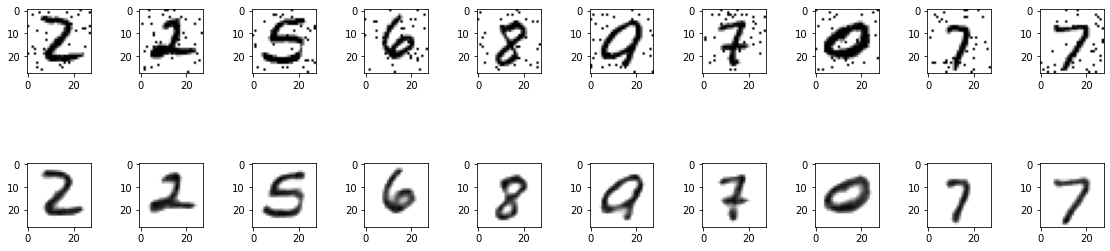

In [ ]:
# Restore and see the 5% corrupted test dataset
restored_5 = restoring_model.predict(xtest_corrupted_5)
display_images(xtest_corrupted_5, restored_5)

313/313 [==============================] - 1s 2ms/step


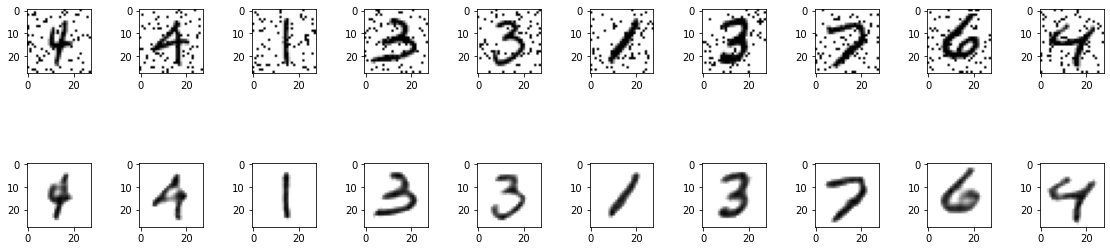

In [ ]:
# Restore and see the 10% corrupted test dataset
restored_10 = restoring_model.predict(xtest_corrupted_10)
display_images(xtest_corrupted_10, restored_10)

313/313 [==============================] - 1s 2ms/step


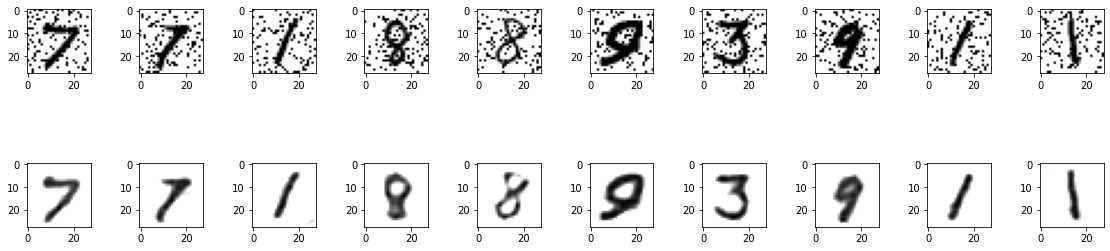

In [ ]:
# Restore and see the 15% corrupted test dataset
restored_15 = restoring_model.predict(xtest_corrupted_15)
display_images(xtest_corrupted_15, restored_15)

## 2.5
(15%) Following Question 2.4, please evaluate the restored test set using the model you trained on clean images in Question 2.1. Report the prediction accuracies for restored images separately at the three different corruption rates. What do you find?

In [ ]:
evaluation_5 = model_2_1.evaluate(restored_5, ytest, verbose=0)
print("Test accuracy on restored images from 5% noise: ", evaluation_5[1])

evaluation_10 = model_2_1.evaluate(restored_10, ytest, verbose=0)
print("Test accuracy on restored images from 10% noise: ", evaluation_10[1])

evaluation_15 = model_2_1.evaluate(restored_15, ytest, verbose=0)
print("Test accuracy on restored images from 15% noise: ", evaluation_15[1])

Test loss:  0.12296006083488464
Test accuracy:  0.9714999794960022


The test accuracies on the restored images are better than the accuracy observed in the corrupted images. In addition, the accuracies observed from the restored images are closer to one another than those observed from the corrupted images.